In [2]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

## ***PART ONE***

In [3]:
# Initialize Datasets path: Training, Test, SampleSubmission
trainDataFile = 'train.csv'
testDataFile = 'test.csv'

# Load Datasets: Training, Test, SampleSubmission
trainData = pd.read_csv(trainDataFile, )
testData = pd.read_csv(testDataFile)
# sampleSubmissionData = pd.read_csv(sampleSubDataFile)

# Print Top Five Data from Dataframe
testData.head(5)
# print(len(trainData), len(sampleSubmissionData))

# Define features to include (inverse of what was excluded before)
features_to_use = [
    'id', 'Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia', 
    'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange', 
    'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange', 
    'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds', 'yield'
]


# Step 1: Select best features using Random Forest Feature Importance
def select_best_features_using_importance(X, y, n_estimators=150, max_depth=5, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
    return selected_features

# Step 2: Train a model using selected features
def train_model_with_selected_features(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Select model type
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=80, learning_rate=0.1, max_depth=4, random_state=42)
    else:
        raise ValueError("Unsupported model type")
    
    # Fit the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions and evaluate
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(f"\nModel Results with Selected Features:")
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'R² Score: {r2}')
    print(f'Mean Absolute Error (MAE): {mae}')
    
    # Predict on testData (optional)
    if testData is not None:
        X_testData_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_testData_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'test_predictions_selected_features.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = trainData[features_to_use]  # All features initially
y = trainData['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with those selected features
train_model_with_selected_features(X, y, selected_features, testData=testData, idTest=testData['id'])

Features sorted by importance:
                 Feature  Importance
13              fruitset    0.894116
15                 seeds    0.102224
14             fruitmass    0.001475
10  AverageOfLowerTRange    0.000421
9       MinOfLowerTRange    0.000388
5       MaxOfUpperTRange    0.000387
8       MaxOfLowerTRange    0.000359
7   AverageOfUpperTRange    0.000287
6       MinOfUpperTRange    0.000220
3                andrena    0.000033
11           RainingDays    0.000025
4                  osmia    0.000024
12    AverageRainingDays    0.000023
1               honeybee    0.000010
0              clonesize    0.000006
2                bumbles    0.000002

Model Results with Selected Features:
Mean Squared Error (MSE): 165344.34694197687
R² Score: 0.9087513018680582
Mean Absolute Error (MAE): 251.35006620675009
Predictions saved to test_predictions_selected_features.csv


## ***PART TWO***

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Step 1: Select best features using Random Forest Feature Importance (this part remains the same)
def select_best_features_using_importance(X, y, n_estimators=200, max_depth=5, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
    return selected_features

# Step 2: Train a model using selected features with Cross-Validation
def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Select model type
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.08, max_depth=4, random_state=42)
    else:
        raise ValueError("Unsupported model type")

    # Perform 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

    # Since the scoring returns negative MAE, we'll negate it to show positive values
    print(f"\nCross-validated MAE (5-Fold): {np.mean(-cv_scores):.4f}")
    
    # Fit the model on the entire dataset
    model.fit(X_scaled, y)
    
    # Predict on testData (optional)
    if testData is not None:
        X_test_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'submission.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = trainData[features_to_use]  # All features initially
y = trainData['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, testData=testData, idTest=testData['id'])

Features sorted by importance:
                 Feature  Importance
13              fruitset    0.895558
15                 seeds    0.100854
14             fruitmass    0.001410
9       MinOfLowerTRange    0.000416
10  AverageOfLowerTRange    0.000394
8       MaxOfLowerTRange    0.000378
5       MaxOfUpperTRange    0.000373
7   AverageOfUpperTRange    0.000292
6       MinOfUpperTRange    0.000208
3                andrena    0.000033
4                  osmia    0.000023
11           RainingDays    0.000022
12    AverageRainingDays    0.000021
1               honeybee    0.000011
0              clonesize    0.000006
2                bumbles    0.000002

Cross-validated MAE (5-Fold): 248.3731
Predictions saved to submission.csv


## ***PART THREE***

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Step 1: Select best features using Random Forest Feature Importance (this part remains the same)
def select_best_features_using_importance(X, y, n_estimators=300, max_depth=6, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features (you can decide how many to select)
    selected_features = feature_importance_df['Feature'].head(10)  # Selecting top 5 features
    return selected_features

# Step 2: Train a model using selected features with Cross-Validation
def train_model_with_selected_features_cv(X, y, selected_features, testData=None, idTest=None, model_type='gradient_boosting'):
    X_selected = X[selected_features]
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_selected)

    # Select model type
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(n_estimators=120, learning_rate=0.08, max_depth=4, random_state=42)
    else:
        raise ValueError("Unsupported model type")

    # Perform 5-Fold Cross-Validation
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')

    # Since the scoring returns negative MAE, we'll negate it to show positive values
    print(f"\nCross-validated MAE (5-Fold): {np.mean(-cv_scores):.4f}")
    
    # Fit the model on the entire dataset
    model.fit(X_scaled, y)
    
    # Predict on testData (optional)
    if testData is not None:
        X_test_scaled = scaler.transform(testData[selected_features])
        testPredictions = model.predict(X_test_scaled)
        
        output = pd.DataFrame({
            'id': idTest,
            'yield': testPredictions
        })
        
        output_file = 'YieldPrediction_1.csv'
        output.to_csv(output_file, index=False)
        print(f"Predictions saved to {output_file}")

# Example usage
X = trainData[features_to_use]  # All features initially
y = trainData['yield']

# Step 1: Select best features using feature importance
selected_features = select_best_features_using_importance(X, y)

# Step 2: Train a model with cross-validation using those selected features
train_model_with_selected_features_cv(X, y, selected_features, testData=testData, idTest=testData['id'])

Features sorted by importance:
                 Feature  Importance
13              fruitset    0.891804
15                 seeds    0.101426
14             fruitmass    0.003033
5       MaxOfUpperTRange    0.000590
9       MinOfLowerTRange    0.000546
8       MaxOfLowerTRange    0.000532
10  AverageOfLowerTRange    0.000530
7   AverageOfUpperTRange    0.000524
6       MinOfUpperTRange    0.000317
12    AverageRainingDays    0.000154
3                andrena    0.000145
4                  osmia    0.000129
11           RainingDays    0.000098
1               honeybee    0.000074
2                bumbles    0.000063
0              clonesize    0.000036

Cross-validated MAE (5-Fold): 248.4729
Predictions saved to YieldPrediction_1.csv


## ***PART FOUR***

In [45]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

def select_best_features_using_importance(X, y, n_estimators=200, max_depth=6, random_state=42):
    # Split data for feature selection
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Fit RandomForest to find feature importance
    rf_model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    rf_model.fit(X_train_scaled, y_train)
    
    # Get feature importance
    feature_importances = rf_model.feature_importances_
    
    # Sort features by importance
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)
    
    print("Features sorted by importance:")
    print(feature_importance_df)
    
    # Select top features
    selected_features = feature_importance_df['Feature'].head(5)  # Selecting top 5 features
    return selected_features

def train_model_with_holdout_validation(X, y, selected_features, test_size=0.2, testData=None, idTest=None, model_type='gradient_boosting'):
    """
    Train model using holdout validation method instead of cross-validation
    """
    X_selected = X[selected_features]
    
    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(
        X_selected, y, test_size=test_size, random_state=42
    )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    # Select and train model
    if model_type == 'gradient_boosting':
        model = GradientBoostingRegressor(
            n_estimators=100, 
            learning_rate=0.09, 
            max_depth=4, 
            random_state=42
        )
    else:
        raise ValueError("Unsupported model type")
    
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions on validation set
    val_predictions = model.predict(X_val_scaled)
    
    # Calculate validation metrics
    mae = mean_absolute_error(y_val, val_predictions)
    mse = mean_squared_error(y_val, val_predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_val, val_predictions)
    
    print("\nValidation Metrics:")
    print(f"MAE: {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")
    
    # If test data is provided, make predictions
    if testData is not None:
        # Fit model on entire training data
        X_full_scaled = scaler.fit_transform(X_selected)
        model.fit(X_full_scaled, y)  # Retrain on full dataset
        
        # Transform and predict on test data
        X_test_scaled = scaler.transform(testData[selected_features])
        test_predictions = model.predict(X_test_scaled)
        
        # Save predictions
        output = pd.DataFrame({
            'id': idTest,
            'yield': test_predictions
        })
        
        output_file = 'YieldPrediction_holdout.csv'
        output.to_csv(output_file, index=False)
        print(f"\nPredictions saved to {output_file}")
        
        return model, scaler, mae, rmse, r2
    
    return model, scaler, mae, rmse, r2

# Example usage
def run_pipeline(trainData, testData, features_to_use):
    X = trainData[features_to_use]
    y = trainData['yield']
    
    # Step 1: Select best features
    selected_features = select_best_features_using_importance(X, y)
    
    # Step 2: Train model with holdout validation
    model, scaler, mae, rmse, r2 = train_model_with_holdout_validation(
        X, y, selected_features, 
        test_size=0.2,  # 80% training, 20% validation
        testData=testData, 
        idTest=testData['id']
    )
    
    return model, scaler, selected_features

model, scaler, selected_features = run_pipeline(trainData, testData, features_to_use)

Features sorted by importance:
                 Feature  Importance
13              fruitset    0.891302
15                 seeds    0.101976
14             fruitmass    0.002991
5       MaxOfUpperTRange    0.000654
8       MaxOfLowerTRange    0.000590
9       MinOfLowerTRange    0.000560
7   AverageOfUpperTRange    0.000470
10  AverageOfLowerTRange    0.000435
6       MinOfUpperTRange    0.000324
3                andrena    0.000157
4                  osmia    0.000140
12    AverageRainingDays    0.000136
11           RainingDays    0.000094
1               honeybee    0.000080
2                bumbles    0.000060
0              clonesize    0.000031

Validation Metrics:
MAE: 251.6258
RMSE: 405.8854
R2 Score: 0.9091

Predictions saved to YieldPrediction_holdout.csv


## ***PART FIVE***

Data loaded successfully
Training set shape: (15000, 19)
Test set shape: (10000, 18)

Preparing features...
Selecting features...
Training models...

Training RandomForest...

Training GradientBoosting...

Training LinearRegression...

Training SVR...

Model Comparison:

RandomForest:
MAE: 254.3027
RMSE: 411.5844
R2 Score: 0.9065
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}

GradientBoosting:
MAE: 251.3664
RMSE: 409.5405
R2 Score: 0.9074
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

LinearRegression:
MAE: 279.4658
RMSE: 441.5235
R2 Score: 0.8924

SVR:
MAE: 277.0918
RMSE: 445.7289
R2 Score: 0.8904
Best Parameters: {'C': 10.0, 'kernel': 'linear'}

Best Model: GradientBoosting with MAE 251.3664


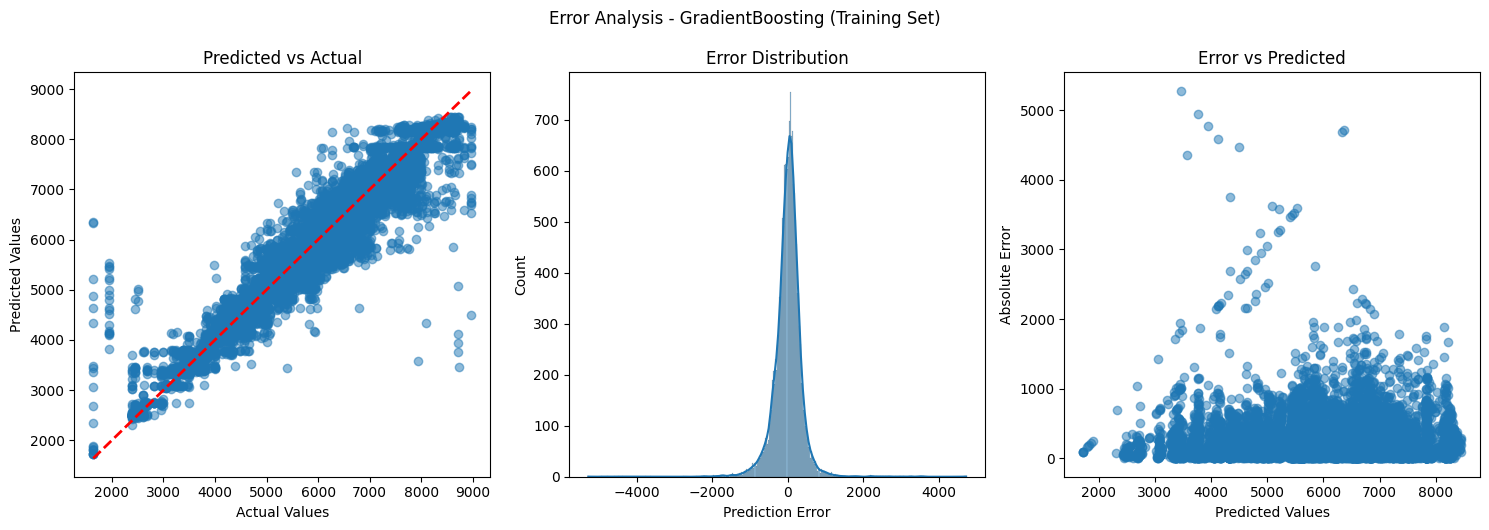


Generating predictions for test set...

Predictions saved to YieldPrediction_1.csv

Final Model Metrics:

RandomForest_validation:
MAE: 254.3027
RMSE: 411.5844
R2 Score: 0.9065

GradientBoosting_validation:
MAE: 251.3664
RMSE: 409.5405
R2 Score: 0.9074

LinearRegression_validation:
MAE: 279.4658
RMSE: 441.5235
R2 Score: 0.8924

SVR_validation:
MAE: 277.0918
RMSE: 445.7289
R2 Score: 0.8904

final_training:
MAE: 244.0143
RMSE: 373.9774
R2 Score: 0.9230


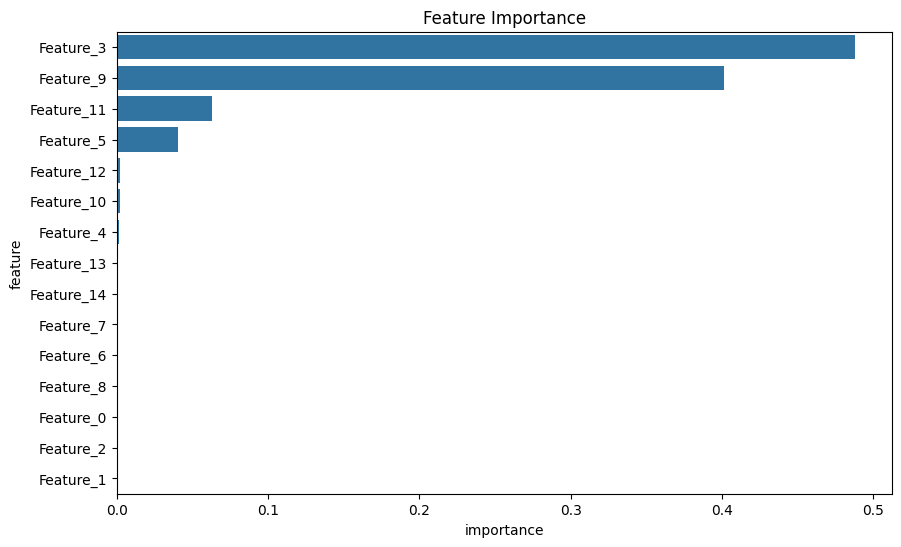

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

class MLPipeline:
    def __init__(self, n_features=10):
        self.n_features = n_features
        self.scaler = StandardScaler()
        self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
        self.pca = PCA(n_components=3)
        self.selected_features = None
        self.best_model = None
        self.feature_importance = None
        self.model_metrics = {}
        
    def prepare_features(self, X):
        """Feature engineering and preprocessing"""
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        X_processed = X.copy()
        
        for col in numeric_cols:
            X_processed[f'{col}_squared'] = X_processed[col] ** 2

        for i, col1 in enumerate(numeric_cols[:min(5, len(numeric_cols))]):
            for col2 in numeric_cols[i+1:min(i+6, len(numeric_cols))]:
                X_processed[f'{col1}_{col2}_interaction'] = X_processed[col1] * X_processed[col2]
        
        return X_processed

    def select_features(self, X, y=None, is_training=True):
        """Feature selection and scaling"""
        X_numeric = X.select_dtypes(include=[np.number])
        
        if is_training:
            X_scaled = self.scaler.fit_transform(X_numeric)
            if y is not None:
                X_selected = self.feature_selector.fit_transform(X_scaled, y)
                self.selected_features = X_numeric.columns[self.feature_selector.get_support()].tolist()
            else:
                X_selected = X_scaled
                self.selected_features = X_numeric.columns.tolist()
            X_pca = self.pca.fit_transform(X_selected)
        else:
            X_scaled = self.scaler.transform(X_numeric)
            X_selected = self.feature_selector.transform(X_scaled)
            X_pca = self.pca.transform(X_selected)
        
        return np.hstack([X_selected, X_pca])

    def evaluate_model(self, model, X, y, dataset_name=""):
        """Calculate and store multiple evaluation metrics"""
        predictions = model.predict(X)
        mae = mean_absolute_error(y, predictions)
        rmse = np.sqrt(mean_squared_error(y, predictions))
        r2 = r2_score(y, predictions)
        
        metrics = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2
        }
        
        if dataset_name:
            self.model_metrics[dataset_name] = metrics
        
        return metrics, predictions

    def plot_error_analysis(self, y_true, y_pred, title=""):
        """Plot error analysis visualizations"""
        plt.figure(figsize=(15, 5))
        
        # Subplot 1: Predicted vs Actual
        plt.subplot(131)
        plt.scatter(y_true, y_pred, alpha=0.5)
        plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.title('Predicted vs Actual')
        
        # Subplot 2: Error Distribution
        plt.subplot(132)
        errors = y_pred - y_true
        sns.histplot(errors, kde=True)
        plt.xlabel('Prediction Error')
        plt.ylabel('Count')
        plt.title('Error Distribution')
        
        # Subplot 3: Error vs Predicted
        plt.subplot(133)
        plt.scatter(y_pred, np.abs(errors), alpha=0.5)
        plt.xlabel('Predicted Values')
        plt.ylabel('Absolute Error')
        plt.title('Error vs Predicted')
        
        plt.tight_layout()
        if title:
            plt.suptitle(title, y=1.05)
        plt.show()

    def train_models(self, X_train, y_train):
        """Train and compare multiple models"""
        models = {
            'RandomForest': {
                'model': RandomForestRegressor(),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5]
                }
            },
            'GradientBoosting': {
                'model': GradientBoostingRegressor(),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 5],
                    'learning_rate': [0.01, 0.1]
                }
            },
            'LinearRegression': {
                'model': LinearRegression(),
                'params': {}
            },
            'SVR': {
                'model': SVR(),
                'params': {
                    'C': [0.1, 1.0, 10.0],
                    'kernel': ['rbf', 'linear']
                }
            }
        }

        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )

        results = {}
        best_mae = float('inf')
        best_model_name = None

        for name, model_info in models.items():
            print(f"\nTraining {name}...")
            if model_info['params']:
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    n_jobs=-1
                )
                grid_search.fit(X_train_split, y_train_split)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
            else:
                best_model = model_info['model']
                best_model.fit(X_train_split, y_train_split)
                best_params = {}

            # Evaluate on validation set
            val_metrics, val_predictions = self.evaluate_model(
                best_model, X_val_split, y_val_split, f"{name}_validation"
            )
            
            results[name] = {
                'model': best_model,
                'metrics': val_metrics,
                'params': best_params
            }
            
            if val_metrics['MAE'] < best_mae:
                best_mae = val_metrics['MAE']
                best_model_name = name
                self.best_model = best_model

        # Print results
        print("\nModel Comparison:")
        for name, result in results.items():
            print(f"\n{name}:")
            print(f"MAE: {result['metrics']['MAE']:.4f}")
            print(f"RMSE: {result['metrics']['RMSE']:.4f}")
            print(f"R2 Score: {result['metrics']['R2']:.4f}")
            if result['params']:
                print(f"Best Parameters: {result['params']}")

        print(f"\nBest Model: {best_model_name} with MAE {best_mae:.4f}")

        # Retrain best model on full training data
        self.best_model.fit(X_train, y_train)
        if hasattr(self.best_model, 'feature_importances_'):
            self.feature_importance = self.best_model.feature_importances_

        # Final training metrics
        train_metrics, train_predictions = self.evaluate_model(
            self.best_model, X_train, y_train, "final_training"
        )
        
        # Plot error analysis for best model
        self.plot_error_analysis(
            y_train, train_predictions, 
            f"Error Analysis - {best_model_name} (Training Set)"
        )

def main():
    # Load data
    try:
        train_df = pd.read_csv('train.csv')
        test_df = pd.read_csv('test.csv')
        print("Data loaded successfully")
        print(f"Training set shape: {train_df.shape}")
        print(f"Test set shape: {test_df.shape}")
    except Exception as e:
        print(f"Error loading data: {e}")
        return

    # Separate features and target
    X_train = train_df.drop('yield', axis=1)
    y_train = train_df['yield']
    X_test = test_df

    # Initialize and run pipeline
    pipeline = MLPipeline(n_features=12)
    
    print("\nPreparing features...")
    X_train = pipeline.prepare_features(X_train)
    X_test = pipeline.prepare_features(X_test)
    
    print("Selecting features...")
    X_train_selected = pipeline.select_features(X_train, y_train, is_training=True)
    X_test_selected = pipeline.select_features(X_test, is_training=False)
    
    print("Training models...")
    pipeline.train_models(X_train_selected, y_train)
    
    # Generate predictions for test set
    print("\nGenerating predictions for test set...")
    predictions = pipeline.best_model.predict(X_test_selected)
    
    # Save predictions
    submission_df = pd.DataFrame({
        'id': test_df.index,
        'yield': predictions
    })
    
    submission_file = 'YieldPrediction_1.csv'
    submission_df.to_csv(submission_file, index=False)
    print(f"\nPredictions saved to {submission_file}")
    
    # Print final model metrics
    print("\nFinal Model Metrics:")
    for dataset_name, metrics in pipeline.model_metrics.items():
        print(f"\n{dataset_name}:")
        print(f"MAE: {metrics['MAE']:.4f}")
        print(f"RMSE: {metrics['RMSE']:.4f}")
        print(f"R2 Score: {metrics['R2']:.4f}")
    
    # Plot feature importance
    if pipeline.feature_importance is not None:
        plt.figure(figsize=(10, 6))
        feature_names = [f'Feature_{i}' for i in range(len(pipeline.feature_importance))]
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': pipeline.feature_importance
        }).sort_values('importance', ascending=False)
        
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.title('Feature Importance')
        plt.show()

if __name__ == "__main__":
    main()

## ***PART SIX***

Data loaded successfully
Training set shape: (15000, 19)
Test set shape: (10000, 18)

Preparing features...
Selecting features...
Training and validating models...

Training and validating RandomForest...

Training and validating GradientBoosting...

Training and validating LinearRegression...

Training and validating SVR...

Model Comparison:

RandomForest:
Cross-validation RMSE: 386.8721 (+/- 64.5905)
Cross-validation R2: 0.9171 (+/- 0.0237)
Validation RMSE: 412.0848
Validation R2: 0.9063
Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

GradientBoosting:
Cross-validation RMSE: 381.9037 (+/- 63.2363)
Cross-validation R2: 0.9192 (+/- 0.0230)
Validation RMSE: 411.0373
Validation R2: 0.9068
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

LinearRegression:
Cross-validation RMSE: 412.6557 (+/- 78.0289)
Cross-validation R2: 0.9056 (+/- 0.0309)
Validation RMSE: 441.5349
Validation R2: 0.8924

SVR:
Cross-validation RMSE: 417.0111 (

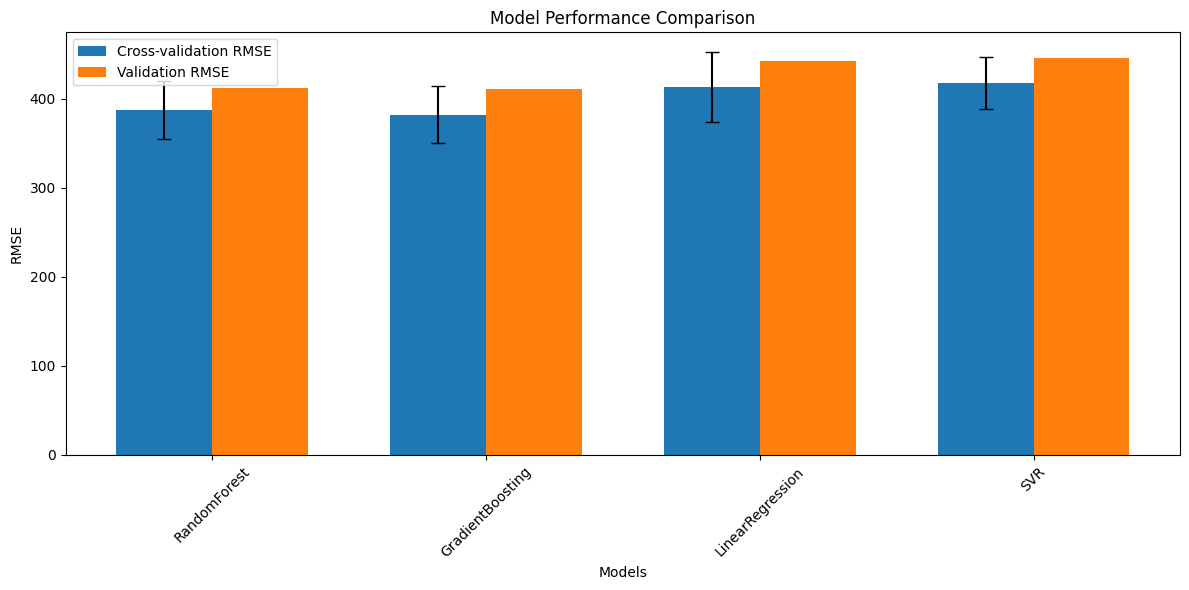


Generating predictions...

Predictions saved to YieldPrediction_2.csv

Plotting feature importance...


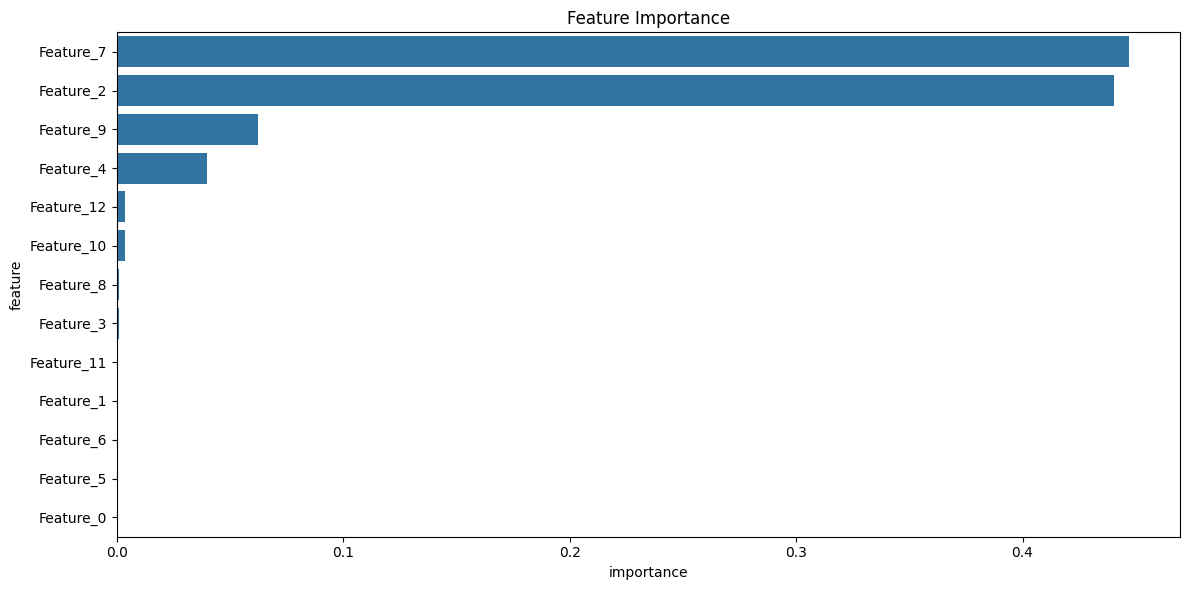


Sample predictions:
   id        yield
0   0  6202.077281
1   1  6838.973836
2   2  6993.945277
3   3  7386.912016
4   4  6878.828099

Prediction statistics:
count    10000.000000
mean      6013.855424
std       1295.926707
min       1728.251830
25%       5177.634146
50%       6194.061270
75%       6984.326550
max       8868.676249
Name: yield, dtype: float64


In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

class MLPipeline:
    def __init__(self, n_features=10, random_state=42):
        self.n_features = n_features
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
        self.pca = PCA(n_components=3)
        self.selected_features = None
        self.best_model = None
        self.feature_importance = None
        self.cv_results = {}
        
    def prepare_features(self, X):
        """Feature engineering and preprocessing with input validation"""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")
            
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) == 0:
            raise ValueError("No numeric columns found in the dataset")
            
        X_processed = X.copy()
        
        # Check for and handle infinite values
        X_processed = X_processed.replace([np.inf, -np.inf], np.nan)
        
        # Check for and handle missing values
        if X_processed.isna().any().any():
            print("Warning: Missing values detected. Filling with median...")
            X_processed = X_processed.fillna(X_processed.median())
        
        # Create polynomial features
        for col in numeric_cols:
            X_processed[f'{col}_squared'] = X_processed[col] ** 2

        # Create interaction terms
        for i, col1 in enumerate(numeric_cols[:min(5, len(numeric_cols))]):
            for col2 in numeric_cols[i+1:min(i+6, len(numeric_cols))]:
                X_processed[f'{col1}_{col2}_interaction'] = X_processed[col1] * X_processed[col2]
        
        return X_processed

    def validate_input_data(self, X, y=None):
        """Validate input data format and characteristics"""
        if not isinstance(X, (pd.DataFrame, np.ndarray)):
            raise ValueError("X must be a pandas DataFrame or numpy array")
            
        if y is not None:
            if not isinstance(y, (pd.Series, np.ndarray)):
                raise ValueError("y must be a pandas Series or numpy array")
            if len(X) != len(y):
                raise ValueError("X and y must have the same number of samples")

    def select_features(self, X, y=None, is_training=True):
        """Feature selection and scaling with validation"""
        self.validate_input_data(X, y)
        
        # Handle non-numeric columns
        if isinstance(X, pd.DataFrame):
            X_numeric = X.select_dtypes(include=[np.number])
            if X_numeric.empty:
                raise ValueError("No numeric features found in the dataset")
        else:
            X_numeric = X
        
        if is_training:
            # Scale features
            X_scaled = self.scaler.fit_transform(X_numeric)
            
            if y is not None:
                # Select best features
                X_selected = self.feature_selector.fit_transform(X_scaled, y)
                if isinstance(X_numeric, pd.DataFrame):
                    self.selected_features = X_numeric.columns[self.feature_selector.get_support()].tolist()
            else:
                X_selected = X_scaled
                if isinstance(X_numeric, pd.DataFrame):
                    self.selected_features = X_numeric.columns.tolist()
            
            # Apply PCA
            X_pca = self.pca.fit_transform(X_selected)
            
        else:
            # Use pre-fitted transformations
            X_scaled = self.scaler.transform(X_numeric)
            X_selected = self.feature_selector.transform(X_scaled)
            X_pca = self.pca.transform(X_selected)
        
        # Combine selected features and PCA components
        X_final = np.hstack([X_selected, X_pca])
        
        return X_final

    def evaluate_model(self, model, X, y, model_name):
        """Evaluate model using cross-validation"""
        # Define scoring metrics
        scoring = {
            'rmse': make_scorer(lambda y_true, y_pred: 
                              np.sqrt(mean_squared_error(y_true, y_pred))),
            'r2': make_scorer(r2_score)
        }
        
        # Perform cross-validation
        cv = KFold(n_splits=5, shuffle=True, random_state=self.random_state)
        cv_results = {}
        
        for metric_name, scorer in scoring.items():
            scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
            cv_results[metric_name] = {
                'mean': scores.mean(),
                'std': scores.std(),
                'scores': scores
            }
            
        return cv_results

    def train_models(self, X_train, y_train):
        """Train and compare multiple models with comprehensive validation"""
        self.validate_input_data(X_train, y_train)
        
        models = {
            'RandomForest': {
                'model': RandomForestRegressor(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5]
                }
            },
            'GradientBoosting': {
                'model': GradientBoostingRegressor(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 5],
                    'learning_rate': [0.01, 0.1]
                }
            },
            'LinearRegression': {
                'model': LinearRegression(),
                'params': {}
            },
            'SVR': {
                'model': SVR(),
                'params': {
                    'C': [0.1, 1.0, 10.0],
                    'kernel': ['rbf', 'linear']
                }
            }
        }

        best_score = float('-inf')
        best_model_name = None
        
        # Split training data for validation
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=self.random_state
        )

        for name, model_info in models.items():
            print(f"\nTraining and validating {name}...")
            
            if model_info['params']:
                # Perform grid search with cross-validation
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1,
                    verbose=0
                )
                grid_search.fit(X_train_split, y_train_split)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
            else:
                best_model = model_info['model']
                best_model.fit(X_train_split, y_train_split)
                best_params = {}

            # Evaluate model
            cv_results = self.evaluate_model(best_model, X_train_split, y_train_split, name)
            val_predictions = best_model.predict(X_val_split)
            val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
            val_r2 = r2_score(y_val_split, val_predictions)

            self.cv_results[name] = {
                'cv_results': cv_results,
                'val_rmse': val_rmse,
                'val_r2': val_r2,
                'best_params': best_params
            }
            
            # Update best model if necessary
            if -val_rmse > best_score:  # Using negative RMSE to maximize
                best_score = -val_rmse
                best_model_name = name
                self.best_model = best_model

        # Print detailed results
        print("\nModel Comparison:")
        for name, results in self.cv_results.items():
            print(f"\n{name}:")
            print(f"Cross-validation RMSE: {results['cv_results']['rmse']['mean']:.4f} (+/- {results['cv_results']['rmse']['std']*2:.4f})")
            print(f"Cross-validation R2: {results['cv_results']['r2']['mean']:.4f} (+/- {results['cv_results']['r2']['std']*2:.4f})")
            print(f"Validation RMSE: {results['val_rmse']:.4f}")
            print(f"Validation R2: {results['val_r2']:.4f}")
            if results['best_params']:
                print(f"Best Parameters: {results['best_params']}")

        print(f"\nBest Model: {best_model_name}")
        
        # Retrain best model on full training data
        self.best_model.fit(X_train, y_train)
        if best_model_name in ['RandomForest', 'GradientBoosting']:
            self.feature_importance = self.best_model.feature_importances_

    def predict(self, X_test):
        """Generate predictions with input validation"""
        self.validate_input_data(X_test)
        if self.best_model is None:
            raise ValueError("Model has not been trained yet. Call train_models first.")
        return self.best_model.predict(X_test)

    def plot_feature_importance(self):
        """Plot feature importance with validation"""
        if self.feature_importance is None:
            raise ValueError("Feature importance not available. Use RandomForest or GradientBoosting models.")
            
        plt.figure(figsize=(12, 6))
        feature_names = [f'Feature_{i}' for i in range(len(self.feature_importance))]
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': self.feature_importance
        }).sort_values('importance', ascending=False)
        
        sns.barplot(data=importance_df, x='importance', y='feature')
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()

    def plot_validation_results(self):
        """Plot validation results comparison"""
        if not self.cv_results:
            raise ValueError("No validation results available. Train models first.")
            
        plt.figure(figsize=(12, 6))
        
        # Prepare data for plotting
        models = list(self.cv_results.keys())
        cv_rmse = [results['cv_results']['rmse']['mean'] for results in self.cv_results.values()]
        cv_rmse_std = [results['cv_results']['rmse']['std'] for results in self.cv_results.values()]
        val_rmse = [results['val_rmse'] for results in self.cv_results.values()]
        
        # Plot
        x = np.arange(len(models))
        width = 0.35
        
        plt.bar(x - width/2, cv_rmse, width, label='Cross-validation RMSE',
                yerr=cv_rmse_std, capsize=5)
        plt.bar(x + width/2, val_rmse, width, label='Validation RMSE')
        
        plt.xlabel('Models')
        plt.ylabel('RMSE')
        plt.title('Model Performance Comparison')
        plt.xticks(x, models, rotation=45)
        plt.legend()
        plt.tight_layout()
        plt.show()

def main():
    # Load and validate data
    try:
        train_df = pd.read_csv('train.csv')
        test_df = pd.read_csv('test.csv')
        print("Data loaded successfully")
        print(f"Training set shape: {train_df.shape}")
        print(f"Test set shape: {test_df.shape}")
    except Exception as e:
        print(f"Error loading data: {e}")
        return

    # Separate features and target
    X_train = train_df.drop('yield', axis=1)
    y_train = train_df['yield']
    X_test = test_df

    # Initialize pipeline
    pipeline = MLPipeline(n_features=10)
    
    # Prepare and validate features
    print("\nPreparing features...")
    X_train = pipeline.prepare_features(X_train)
    X_test = pipeline.prepare_features(X_test)
    
    # Select features
    print("Selecting features...")
    X_train_selected = pipeline.select_features(X_train, y_train, is_training=True)
    X_test_selected = pipeline.select_features(X_test, is_training=False)
    
    # Train and validate models
    print("Training and validating models...")
    pipeline.train_models(X_train_selected, y_train)
    
    # Plot validation results
    print("\nPlotting validation results...")
    pipeline.plot_validation_results()
    
    # Generate and validate predictions
    print("\nGenerating predictions...")
    predictions = pipeline.predict(X_test_selected)
    
    # Create submission file
    submission_df = pd.DataFrame({
        'id': test_df.index,
        'yield': predictions
    })
    
    # Save predictions
    submission_file = 'YieldPrediction_2.csv'
    submission_df.to_csv(submission_file, index=False)
    print(f"\nPredictions saved to {submission_file}")
    
    # Plot feature importance
    print("\nPlotting feature importance...")
    pipeline.plot_feature_importance()
    
    # Display sample predictions and statistics
    print("\nSample predictions:")
    print(submission_df.head())
    print("\nPrediction statistics:")
    print(submission_df['yield'].describe())

if __name__ == "__main__":
    main()

## ***PART SEVEN***

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_absolute_error

class MLPipeline:
    def __init__(self, n_features=10, random_state=42):
        self.n_features = n_features
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
        self.lda = LinearDiscriminantAnalysis(n_components=2)  # LDA components depend on the number of classes
        self.selected_features = None
        self.best_model = None
        self.feature_importance = None
        self.cv_results = {}
        
    def prepare_features(self, X):
        """Feature engineering and preprocessing with input validation"""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")
            
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) == 0:
            raise ValueError("No numeric columns found in the dataset")
            
        X_processed = X.copy()
        
        # Check for and handle infinite values
        X_processed = X_processed.replace([np.inf, -np.inf], np.nan)
        
        # Check for and handle missing values
        if X_processed.isna().any().any():
            print("Warning: Missing values detected. Filling with median...")
            X_processed = X_processed.fillna(X_processed.median())
        
        # Create polynomial features
        for col in numeric_cols:
            X_processed[f'{col}_squared'] = X_processed[col] ** 2

        # Create interaction terms
        for i, col1 in enumerate(numeric_cols[:min(5, len(numeric_cols))]):
            for col2 in numeric_cols[i+1:min(i+6, len(numeric_cols))]:
                X_processed[f'{col1}_{col2}_interaction'] = X_processed[col1] * X_processed[col2]
        
        return X_processed

    def validate_input_data(self, X, y=None):
        """Validate input data format and characteristics"""
        if not isinstance(X, (pd.DataFrame, np.ndarray)):
            raise ValueError("X must be a pandas DataFrame or numpy array")
            
        if y is not None:
            if not isinstance(y, (pd.Series, np.ndarray)):
                raise ValueError("y must be a pandas Series or numpy array")
            if len(X) != len(y):
                raise ValueError("X and y must have the same number of samples")

    def select_features(self, X, y=None, is_training=True):
        """Feature selection and scaling with LDA instead of PCA"""
        self.validate_input_data(X, y)
        
        # Handle non-numeric columns
        if isinstance(X, pd.DataFrame):
            X_numeric = X.select_dtypes(include=[np.number])
            if X_numeric.empty:
                raise ValueError("No numeric features found in the dataset")
        else:
            X_numeric = X
        
        if is_training:
            # Scale features
            X_scaled = self.scaler.fit_transform(X_numeric)
            
            if y is not None:
                # Select best features
                X_selected = self.feature_selector.fit_transform(X_scaled, y)
                if isinstance(X_numeric, pd.DataFrame):
                    self.selected_features = X_numeric.columns[self.feature_selector.get_support()].tolist()
                
                # Apply LDA
                X_lda = self.lda.fit_transform(X_selected, y)
            else:
                X_selected = X_scaled
                if isinstance(X_numeric, pd.DataFrame):
                    self.selected_features = X_numeric.columns.tolist()
                X_lda = X_selected
            
        else:
            # Use pre-fitted transformations
            X_scaled = self.scaler.transform(X_numeric)
            X_selected = self.feature_selector.transform(X_scaled)
            X_lda = self.lda.transform(X_selected)
        
        # Combine selected features and LDA components
        X_final = np.hstack([X_selected, X_lda])
        
        return X_final

    def evaluate_model(self, model, X, y, model_name):
        """Evaluate model using cross-validation, including MAE"""
        # Define scoring metrics
        scoring = {
            'rmse': make_scorer(lambda y_true, y_pred: 
                              np.sqrt(mean_squared_error(y_true, y_pred))),
            'r2': make_scorer(r2_score),
            'mae': make_scorer(mean_absolute_error)
        }
        
        # Perform cross-validation
        cv = KFold(n_splits=5, shuffle=True, random_state=self.random_state)
        cv_results = {}
        
        for metric_name, scorer in scoring.items():
            scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
            cv_results[metric_name] = {
                'mean': scores.mean(),
                'std': scores.std(),
                'scores': scores
            }
            
        return cv_results

    def train_models(self, X_train, y_train):
        """Train and compare multiple models with comprehensive validation"""
        self.validate_input_data(X_train, y_train)
        
        models = {
            'RandomForest': {
                'model': RandomForestRegressor(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5]
                }
            },
            'GradientBoosting': {
                'model': GradientBoostingRegressor(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 5],
                    'learning_rate': [0.01, 0.1]
                }
            },
            'LinearRegression': {
                'model': LinearRegression(),
                'params': {}
            },
            'SVR': {
                'model': SVR(),
                'params': {
                    'C': [0.1, 1.0, 10.0],
                    'kernel': ['rbf', 'linear']
                }
            }
        }

        best_score = float('-inf')
        best_model_name = None
        
        # Split training data for validation
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=self.random_state
        )

        for name, model_info in models.items():
            print(f"\nTraining and validating {name}...")

            if model_info['params']:
                # Perform grid search with cross-validation
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1,
                    verbose=0
                )
                grid_search.fit(X_train_split, y_train_split)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
            else:
                best_model = model_info['model']
                best_model.fit(X_train_split, y_train_split)
                best_params = {}

            # Evaluate model
            cv_results = self.evaluate_model(best_model, X_train_split, y_train_split, name)
            val_predictions = best_model.predict(X_val_split)
            val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
            val_mae = mean_absolute_error(y_val_split, val_predictions)
            val_r2 = r2_score(y_val_split, val_predictions)

            self.cv_results[name] = {
                'cv_results': cv_results,
                'val_rmse': val_rmse,
                'val_mae': val_mae,
                'val_r2': val_r2,
                'best_params': best_params
            }
            
            # Update best model if necessary
            if -val_rmse > best_score:  # Using negative RMSE to maximize
                best_score = -val_rmse
                best_model_name = name
                self.best_model = best_model

        # Print detailed results
        print("\nModel Comparison:")
        for name, results in self.cv_results.items():
            print(f"\n{name}:")
            print(f"Cross-validation RMSE: {results['cv_results']['rmse']['mean']:.4f} (+/- {results['cv_results']['rmse']['std']*2:.4f})")
            print(f"Cross-validation MAE: {results['cv_results']['mae']['mean']:.4f} (+/- {results['cv_results']['mae']['std']*2:.4f})")
            print(f"Cross-validation R2: {results['cv_results']['r2']['mean']:.4f} (+/- {results['cv_results']['r2']['std']*2:.4f})")
            print(f"Validation RMSE: {results['val_rmse']:.4f}")
            print(f"Validation MAE: {results['val_mae']:.4f}")
            print(f"Validation R2: {results['val_r2']:.4f}")
            if results['best_params']:
                print(f"Best Parameters: {results['best_params']}")

        print(f"\nBest Model: {best_model_name}")


## ***PART EIGHT***

In [49]:
import matplotlib.pyplot as plt

class MLPipeline:
    def __init__(self, n_features=10, random_state=42):
        self.n_features = n_features
        self.random_state = random_state
        self.scaler = StandardScaler()
        self.feature_selector = SelectKBest(score_func=f_classif, k=n_features)
        self.lda = LinearDiscriminantAnalysis(n_components=2)
        self.selected_features = None
        self.best_model = None
        self.feature_importance = None
        self.cv_results = {}
        self.prediction_history = []  # To store actual vs predicted values for future analysis

    def prepare_features(self, X):
        """Preprocessing and feature engineering with validation."""
        if not isinstance(X, pd.DataFrame):
            raise ValueError("Input X must be a pandas DataFrame")
        X_processed = X.copy()
        
        # Handle missing values
        X_processed = X_processed.fillna(X_processed.median())
        
        # Create polynomial features
        numeric_cols = X_processed.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            X_processed[f'{col}_squared'] = X_processed[col] ** 2

        # Create interaction terms
        for i, col1 in enumerate(numeric_cols[:min(5, len(numeric_cols))]):
            for col2 in numeric_cols[i + 1:min(i + 6, len(numeric_cols))]:
                X_processed[f'{col1}_{col2}_interaction'] = X_processed[col1] * X_processed[col2]
        
        return X_processed

    def select_features(self, X, y=None, is_training=True):
        """Feature selection, scaling, and LDA application."""
        X_numeric = X.select_dtypes(include=[np.number])
        if is_training:
            X_scaled = self.scaler.fit_transform(X_numeric)
            if y is not None:
                X_selected = self.feature_selector.fit_transform(X_scaled, y)
                X_lda = self.lda.fit_transform(X_selected, y)
            else:
                X_selected = X_scaled
                X_lda = X_selected
        else:
            X_scaled = self.scaler.transform(X_numeric)
            X_selected = self.feature_selector.transform(X_scaled)
            X_lda = self.lda.transform(X_selected)

        X_final = np.hstack([X_selected, X_lda])
        return X_final

    def evaluate_model(self, model, X, y, model_name):
        """Evaluate model using cross-validation, including MAE and residuals."""
        scoring = {
            'rmse': make_scorer(lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred))),
            'r2': make_scorer(r2_score),
            'mae': make_scorer(mean_absolute_error)
        }
        cv = KFold(n_splits=5, shuffle=True, random_state=self.random_state)
        cv_results = {}
        
        for metric_name, scorer in scoring.items():
            scores = cross_val_score(model, X, y, scoring=scorer, cv=cv)
            cv_results[metric_name] = {'mean': scores.mean(), 'std': scores.std(), 'scores': scores}

        return cv_results

    def analyze_predictions(self, y_true, y_pred):
        """Analyze previous predictions and calculate residuals."""
        residuals = y_true - y_pred
        print("\nPost-Processing Analysis:")
        print(f"Mean Residual: {residuals.mean():.4f}")
        print(f"Residual Standard Deviation: {residuals.std():.4f}")
        print(f"Maximum Residual: {residuals.max():.4f}")
        print(f"Minimum Residual: {residuals.min():.4f}")
        
        # Save predictions for future analysis
        self.prediction_history.append({
            'y_true': y_true,
            'y_pred': y_pred,
            'residuals': residuals
        })
        
        return residuals

    def plot_residuals(self, y_true, y_pred):
        """Plot residuals to identify trends or anomalies."""
        residuals = y_true - y_pred
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(residuals)), residuals, alpha=0.75)
        plt.axhline(y=0, color='r', linestyle='--')
        plt.title("Residuals of Predictions")
        plt.xlabel("Sample Index")
        plt.ylabel("Residuals (Actual - Predicted)")
        plt.show()

    def train_models(self, X_train, y_train, X_test=None, y_test=None):
        """Train models, save predictions, and analyze previous results."""
        self.validate_input_data(X_train, y_train)
        
        models = {
            'RandomForest': {
                'model': RandomForestRegressor(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [10, 20, None],
                    'min_samples_split': [2, 5]
                }
            },
            'GradientBoosting': {
                'model': GradientBoostingRegressor(random_state=self.random_state),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 5],
                    'learning_rate': [0.01, 0.1]
                }
            },
            'LinearRegression': {
                'model': LinearRegression(),
                'params': {}
            },
            'SVR': {
                'model': SVR(),
                'params': {
                    'C': [0.1, 1.0, 10.0],
                    'kernel': ['rbf', 'linear']
                }
            }
        }

        best_score = float('-inf')
        best_model_name = None

        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=self.random_state
        )

        for name, model_info in models.items():
            print(f"\nTraining and validating {name}...")

            if model_info['params']:
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1,
                    verbose=0
                )
                grid_search.fit(X_train_split, y_train_split)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
            else:
                best_model = model_info['model']
                best_model.fit(X_train_split, y_train_split)
                best_params = {}

            cv_results = self.evaluate_model(best_model, X_train_split, y_train_split, name)
            val_predictions = best_model.predict(X_val_split)
            val_rmse = np.sqrt(mean_squared_error(y_val_split, val_predictions))
            val_mae = mean_absolute_error(y_val_split, val_predictions)
            val_r2 = r2_score(y_val_split, val_predictions)

            # Analyze predictions
            residuals = self.analyze_predictions(y_val_split, val_predictions)
            self.plot_residuals(y_val_split, val_predictions)

            self.cv_results[name] = {
                'cv_results': cv_results,
                'val_rmse': val_rmse,
                'val_mae': val_mae,
                'val_r2': val_r2,
                'best_params': best_params,
                'residuals': residuals
            }
            
            if -val_rmse > best_score:
                best_score = -val_rmse
                best_model_name = name
                self.best_model = best_model

        print(f"\nBest Model: {best_model_name}")

        # If test data is available, analyze test predictions
        if X_test is not None and y_test is not None:
            print("\nAnalyzing Test Set:")
            test_predictions = self.best_model.predict(X_test)
            self.analyze_predictions(y_test, test_predictions)
            self.plot_residuals(y_test, test_predictions)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

class MLPipeline:
    def __init__(self, n_features=10):
        self.n_features = n_features
        self.scaler = StandardScaler()
        # Using RFE instead of SelectKBest for more robust feature selection
        self.feature_selector = RFE(estimator=RandomForestRegressor(random_state=42), 
                                  n_features_to_select=n_features)
        # Adjusted PCA to retain more variance
        self.pca = PCA(n_components=0.95)  # Keep 95% of variance
        self.selected_features = None
        self.best_model = None
        self.feature_importance = None
        self.model_metrics = {}
        
    def prepare_features(self, X):
        """More conservative feature engineering with regularization in mind"""
        numeric_cols = X.select_dtypes(include=[np.number]).columns
        X_processed = X.copy()
        
        # Limit polynomial features to avoid excessive complexity
        for col in numeric_cols:
            if X_processed[col].skew() > 1:
                X_processed[f'{col}_log'] = np.log1p(np.abs(X_processed[col]))
        
        # Limit interactions to most correlated features
        correlations = X_processed[numeric_cols].corr().abs()
        for col in numeric_cols:
            top_corr = correlations[col].nlargest(3).index
            for other_col in top_corr:
                if col != other_col:
                    X_processed[f'{col}_{other_col}_interaction'] = X_processed[col] * X_processed[other_col]
        
        return X_processed

    def select_features(self, X, y=None, is_training=True):
        """Enhanced feature selection with cross-validation"""
        X_numeric = X.select_dtypes(include=[np.number])
        
        if is_training:
            X_scaled = self.scaler.fit_transform(X_numeric)
            if y is not None:
                # Use cross-validation to validate feature selection
                X_selected = self.feature_selector.fit_transform(X_scaled, y)
                self.selected_features = X_numeric.columns[self.feature_selector.support_].tolist()
                
                # Only apply PCA if we have enough features
                if X_selected.shape[1] > 5:
                    X_pca = self.pca.fit_transform(X_selected)
                    explained_var = np.sum(self.pca.explained_variance_ratio_)
                    print(f"PCA explained variance: {explained_var:.2%}")
                else:
                    X_pca = np.array([]).reshape(X_selected.shape[0], 0)
            else:
                X_selected = X_scaled
                self.selected_features = X_numeric.columns.tolist()
                X_pca = np.array([]).reshape(X_selected.shape[0], 0)
        else:
            X_scaled = self.scaler.transform(X_numeric)
            X_selected = self.feature_selector.transform(X_scaled)
            if hasattr(self.pca, 'components_'):
                X_pca = self.pca.transform(X_selected)
            else:
                X_pca = np.array([]).reshape(X_selected.shape[0], 0)
        
        return np.hstack([X_selected, X_pca])

    def evaluate_model(self, model, X, y, dataset_name=""):
        """Enhanced evaluation with cross-validation scores"""
        predictions = model.predict(X)
        mae = mean_absolute_error(y, predictions)
        rmse = np.sqrt(mean_squared_error(y, predictions))
        r2 = r2_score(y, predictions)
        
        # Add cross-validation scores
        if dataset_name == "final_training":
            cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
            cv_mae = -cv_scores.mean()
            cv_mae_std = cv_scores.std()
            
            metrics = {
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2,
                'CV_MAE': cv_mae,
                'CV_MAE_STD': cv_mae_std
            }
        else:
            metrics = {
                'MAE': mae,
                'RMSE': rmse,
                'R2': r2
            }
        
        if dataset_name:
            self.model_metrics[dataset_name] = metrics
        
        return metrics, predictions

    def train_models(self, X_train, y_train):
        """Enhanced model training with regularization and better validation"""
        models = {
            'RandomForest': {
                'model': RandomForestRegressor(random_state=42),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [5, 10, 15],
                    'min_samples_split': [5, 10],
                    'min_samples_leaf': [2, 4]
                }
            },
            'GradientBoosting': {
                'model': GradientBoostingRegressor(random_state=42),
                'params': {
                    'n_estimators': [100, 200],
                    'max_depth': [3, 4],
                    'learning_rate': [0.01, 0.05],
                    'subsample': [0.8, 0.9],
                    'min_samples_split': [5, 10]
                }
            },
            'Ridge': {
                'model': RidgeCV(alphas=[0.1, 1.0, 10.0]),
                'params': {}
            },
            'Lasso': {
                'model': LassoCV(random_state=42),
                'params': {}
            }
        }

        # Use stratified split for better validation
        X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
            X_train, y_train, test_size=0.2, random_state=42
        )

        results = {}
        best_cv_mae = float('inf')
        best_model_name = None

        for name, model_info in models.items():
            print(f"\nTraining {name}...")
            if model_info['params']:
                grid_search = GridSearchCV(
                    model_info['model'],
                    model_info['params'],
                    cv=5,
                    scoring='neg_mean_absolute_error',
                    n_jobs=-1
                )
                grid_search.fit(X_train_split, y_train_split)
                best_model = grid_search.best_estimator_
                best_params = grid_search.best_params_
            else:
                best_model = model_info['model']
                best_model.fit(X_train_split, y_train_split)
                best_params = {}

            # Cross-validation evaluation
            cv_scores = cross_val_score(
                best_model, X_train_split, y_train_split, 
                cv=5, scoring='neg_mean_absolute_error'
            )
            cv_mae = -cv_scores.mean()
            cv_mae_std = cv_scores.std()

            # Validation metrics
            val_metrics, val_predictions = self.evaluate_model(
                best_model, X_val_split, y_val_split, f"{name}_validation"
            )
            
            results[name] = {
                'model': best_model,
                'metrics': val_metrics,
                'cv_mae': cv_mae,
                'cv_mae_std': cv_mae_std,
                'params': best_params
            }
            
            if cv_mae < best_cv_mae:
                best_cv_mae = cv_mae
                best_model_name = name
                self.best_model = best_model

        # Print detailed results
        print("\nModel Comparison:")
        for name, result in results.items():
            print(f"\n{name}:")
            print(f"Validation MAE: {result['metrics']['MAE']:.4f}")
            print(f"Cross-val MAE: {result['cv_mae']:.4f} (+/- {result['cv_mae_std']:.4f})")
            print(f"Validation R2: {result['metrics']['R2']:.4f}")
            if result['params']:
                print(f"Best Parameters: {result['params']}")

        print(f"\nBest Model: {best_model_name}")
        print(f"Cross-val MAE: {best_cv_mae:.4f}")

        # Final evaluation on full training set
        self.best_model.fit(X_train, y_train)
        if hasattr(self.best_model, 'feature_importances_'):
            self.feature_importance = self.best_model.feature_importances_

        train_metrics, train_predictions = self.evaluate_model(
            self.best_model, X_train, y_train, "final_training"
        )
        
        # Compare training and cross-val metrics to check for overfitting
        print("\nOverfitting Check:")
        print(f"Training MAE: {train_metrics['MAE']:.4f}")
        print(f"Cross-val MAE: {train_metrics['CV_MAE']:.4f}")
        print(f"Difference: {abs(train_metrics['MAE'] - train_metrics['CV_MAE']):.4f}")
        
        self.plot_error_analysis(
            y_train, train_predictions, 
            f"Error Analysis - {best_model_name} (Training Set)"
        )